In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

récapitulatif

W: weights: le poids qui multiplie l'entree
Loss: fction perte ou l'erreur
en fction de l'erreur on modifie le w pour reduire l'erreur.
On chooisit le pas: vitesse d'apprentissage(le learning rate).
Terme a garder quand on parle du deep.

a chaque Epoch ou entrainement.



autre point : la dérivee c'est le taux de variation.

Entrainer un modele de deep learning c'est minimiser l'erreur

In [2]:
data = tf.keras.datasets.fashion_mnist

In [3]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
training_labels.shape

(60000,)

En deep learning, de façon général on manipule des tenseurs.

pour verifier ndim



In [7]:
test_images.ndim

3

In [8]:
labels = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandals", "shirt",
         "sneaker", "bag", "ankle boot"]

In [9]:
labels[0]

't-shirt/top'

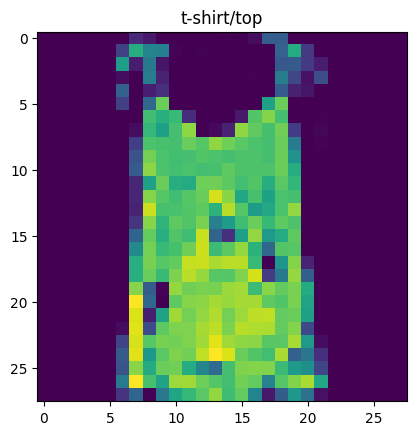

In [10]:
plt.imshow(training_images[67])
plt.title(labels[training_labels[67]])
plt.show()

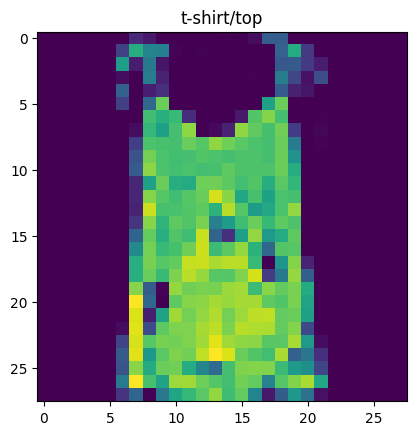

In [11]:
plt.imshow(training_images[67])
plt.title(labels[training_labels[67]])
plt.show()

Comment entrainer les reseaux de neuronne

#Flatten (applatir image)

On considere les pixels comme caracterise individuelles

In [12]:
a_training_images = training_images.reshape((60000, 28*28))
a_test_images = test_images.reshape((-1, 28*28))
#si on met -1 python sait qu'il doit chercher le premier

In [14]:
a_training_images.shape, a_test_images.shape
#on a desormais un reseau de neuronne
#on applatie les image on est passé, d'un shape de (60000,28,28) à un shape (60000,784) pareil pour les donnees de texte

((60000, 784), (10000, 784))

Transformation de label: one hot-encoding(une colonne a 1 et les autrres ont 0).
si une image est de 0 : [1,0,0].

On va avoir trois neuronnes qui feront la prediction sur une classe.

In [16]:
#petit exemple sur le one hot encoding
#c'est ce qu'on va appliquer au label
#si le label c'est 9 et qu on a trois class [0,1,2]
#si pour image A le label est 1 on aura [0,1,0]
#si pour image B est de classe 2 on aura [0,0,1]
x = np.array([1,2,9,1,0])
tf.keras.utils.to_categorical(x)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
training_labels.shape

(60000,)

In [18]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [20]:
#chaque personne a pour label un vecteur de 10,un seul 1 à l'interieur qui a sa position
training_labels.shape

(60000, 10)

In [21]:
training_labels[67]
#le model aura predit le neuronne qui est chargé de prédire le tee-shirt.

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#fction softmax
La fonction mathématique softmax peut être utilisée en machine learning pour convertir un score en probabilité dans un contexte de classification multi-classe.

Ainsi, si dans un contexte de classification d’objets nous obtenons :

Un score de 1200 pour la probabilité que l’objet soit une pomme.
Un score de 600 pour la probabilité que l’objet soit une orange.
Un score de 200 pour la probabilité que l’objet soit une poire.
Un score nul pour les autres probabilités.
L’application de la fonction softmax permettra de générer un score de probabilité normalisé, dont la somme totale des probabilités sera égale à 100%, soit 1.

Les résultats de la fonction softmax nous donneront :

pomme: 0.6
orange : 0.3
poire : 0.1


La fonction d’activation softmax est un élément important dans la conception d’un réseau de neurones.

In [22]:
#petit exemple
output = [6,3,2]
6/(6+3+2) + 3/(6+3+2) + 2/(6+3+2)

1.0

In [23]:
6/(6+3+2),3/(6+3+2),2/(6+3+2)
#on a 0.54 pour 6, 0.27 pour 3 et on 0.18 pour 2
#cette façon de faire n'offre pas de gradient intéressant.

(0.5454545454545454, 0.2727272727272727, 0.18181818181818182)

In [24]:
def sofmax(vect):
  r= np.exp(np.array(vect))
  return r/sum(r)

In [25]:
sofmax(output)
#il a maximisé l'element le plus important et a minimisé les autres.
#c'est ce meme principe qui sera utilisé dans le réseau de neuronne

array([0.93623955, 0.04661262, 0.01714783])

#1er modele de classification

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [27]:
a_training_images.min(), a_training_images.max()

(0, 255)

In [28]:
#normalisation des données
a_training_images = a_training_images /255.0
a_test_images = a_test_images / 255.0

In [29]:
a_training_images.min(), a_training_images.max()

(0.0, 1.0)

In [39]:
#accuracy permet de savoir le taux de bonne de classification
model = Sequential([ Dense(units=784, activation="sigmoid"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="mse", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.2620 - val_loss: 0.0866 - val_accuracy: 0.3734
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0847 - accuracy: 0.4100 - val_loss: 0.0826 - val_accuracy: 0.4701
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0803 - accuracy: 0.4929 - val_loss: 0.0779 - val_accuracy: 0.5066
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0753 - accuracy: 0.5220 - val_loss: 0.0728 - val_accuracy: 0.5409
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0702 - accuracy: 0.5479 - val_loss: 0.0679 - val_accuracy: 0.5666


In [ ]:
#loss: 0.0702 - accuracy: 0.4923 - val_loss: 0.0682 - val_accuracy: 0.5216
#on a 49% de de reussite sur les donnees d'entrainement, sur les donnees de test on a 52% de reussite.
#on peut l'ameliorer en changeant de loss (la maniere de calculer l'erreur).

#Cross Entropy ou Log loss

c'est une métrique utilisée pour mesurer la performance d'un modèle de classification en apprentissage automatique. La perte (ou l'erreur) est mesurée par un nombre compris entre 0 et 1, 0 correspondant à un modèle parfait.

In [40]:
#entrainement avce Cross entropy
model = Sequential([ Dense(units=784, activation="sigmoid"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1208 - accuracy: 0.6745 - val_loss: 0.7879 - val_accuracy: 0.7397
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7005 - accuracy: 0.7630 - val_loss: 0.6643 - val_accuracy: 0.7635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6166 - accuracy: 0.7851 - val_loss: 0.6079 - val_accuracy: 0.7857
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5724 - accuracy: 0.8000 - val_loss: 0.5731 - val_accuracy: 0.7982
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5433 - accuracy: 0.8104 - val_loss: 0.5492 - val_accuracy: 0.8047


In [ ]:
#loss: 0.5440 - accuracy: 0.8108 - val_loss: 0.5519 - val_accuracy: 0.8048
#on a 81% de de reussite sur les donnees d'entrainement, sur les donnees de test on a 80% de reussite.

#fction d'activation relu (Rectified linear Unit)

elle permet tout simplement de remplacer les résultats négatifs par zéro

In [41]:
#entrainement avec Relu
model = Sequential([ Dense(units=784, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6983 - accuracy: 0.7765 - val_loss: 0.5651 - val_accuracy: 0.8016
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4960 - accuracy: 0.8320 - val_loss: 0.5042 - val_accuracy: 0.8250
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4547 - accuracy: 0.8443 - val_loss: 0.4638 - val_accuracy: 0.8386
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4298 - accuracy: 0.8521 - val_loss: 0.4525 - val_accuracy: 0.8429
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4113 - accuracy: 0.8580 - val_loss: 0.4373 - val_accuracy: 0.8469


In [ ]:
#loss: 0.4086 - accuracy: 0.8587 - val_loss: 0.4457 - val_accuracy: 0.8423
#on a 85% de de reussite sur les donnees d'entrainement, sur les donnees de test on a 84% de reussite.

Comparaison entre les differents entrainenements

MSE:           loss: 0.0703 - accuracy: 0.5186 - val_loss: 0.0682 - val_accuracy: 0.5590

Cross Entropy:  loss: 0.5440 - accuracy: 0.8108 - val_loss: 0.5519 - val_accuracy: 0.8048

Relu:           loss: 0.4086 - accuracy: 0.8587 - val_loss: 0.4457 - val_accuracy: 0.8423

In [42]:
#entrainement avec Relu
model = Sequential([ Dense(units=784, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6975 - accuracy: 0.7773 - val_loss: 0.5526 - val_accuracy: 0.8109
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4940 - accuracy: 0.8327 - val_loss: 0.5311 - val_accuracy: 0.8084
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4529 - accuracy: 0.8453 - val_loss: 0.4767 - val_accuracy: 0.8331
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4277 - accuracy: 0.8529 - val_loss: 0.4728 - val_accuracy: 0.8262
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4106 - accuracy: 0.8588 - val_loss: 0.4293 - val_accuracy: 0.8491
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8626 - val_loss: 0.4262 - val_accuracy: 0.8463
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3839 - accuracy: 0.8680 - val_loss: 0.4191 - val_accuracy:

In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 784)               615440    
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
#on est passé à 3 couches
model = Sequential([ Dense(units=784, activation="relu"),
                    Dense(units=128, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6788 - accuracy: 0.7811 - val_loss: 0.5430 - val_accuracy: 0.8081
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4686 - accuracy: 0.8372 - val_loss: 0.4682 - val_accuracy: 0.8334
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4250 - accuracy: 0.8514 - val_loss: 0.4420 - val_accuracy: 0.8426
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3993 - accuracy: 0.8606 - val_loss: 0.4316 - val_accuracy: 0.8474
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3787 - accuracy: 0.8674 - val_loss: 0.4137 - val_accuracy: 0.8535
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3616 - accuracy: 0.8730 - val_loss: 0.3982 - val_accuracy: 0.8575
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3494 - accuracy: 0.8769 - val_loss: 0.3828 - val_accuracy

In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 784)               615440    
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
def plot_loss_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'], label = "loss")
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'], label="val_loss")
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend(loc='upper right')
  plt.show()

def plot_accuracy_curve(history):


  plt.plot(list(range(len(history['accuracy']))), history['accuracy'], label = "accuracy")
  plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], label="val_accuracy")
  plt.xlabel('Epochs')
  plt.ylabel("accuracy")
  plt.title("Accuracy Curve")
  plt.legend(loc='upper right')
  plt.show()

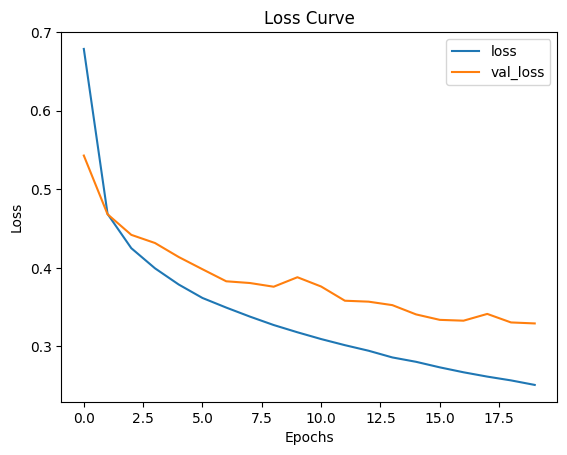

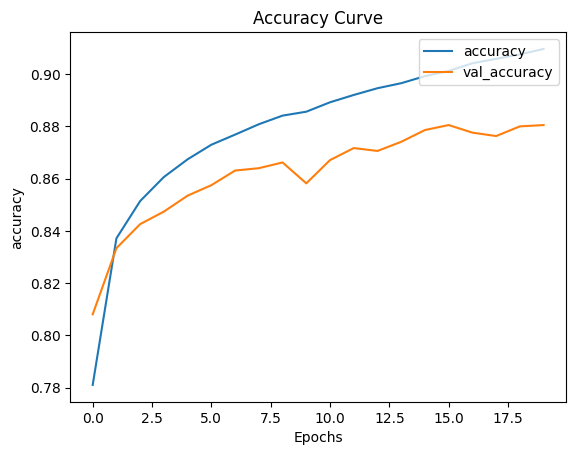

In [47]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [ ]:
#On a un ecart qui se creuse entre le val_accuracy et Accuracy de l'entrainement, Quand on a un gros écart e ntre les donnees d'entrainement et les donnees de test.
#accuracy: 0.9097 - val_loss: 0.3248 - val_accuracy: 0.8843 Quand les donnees d'entrainement devient superieures on donnees de test, on a un overfitting

overfitting :

En pratique, un modèle qui overfit est souvent très facile à détecter. L’overfitting intervient lorsque l’erreur sur les données de test devient croissante. Typiquement, si l’erreur sur les données d’entraînements est beaucoup plus faible que celle sur les données de test, c’est sans doute que votre modèle a trop appris les données



#DropOut

In [49]:
dropout = tf.keras.layers.Dropout(0.5, input_shape=(2,))

In [50]:
x = np.arange(1,11).reshape(5, 2).astype(np.float32)

In [52]:
tf.keras.layers.Dropout

In [51]:
x

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

In [53]:
#combattre l'overfitting avec dropout
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8604 - accuracy: 0.7016 - val_loss: 0.5585 - val_accuracy: 0.8029
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5804 - accuracy: 0.7987 - val_loss: 0.4922 - val_accuracy: 0.8234
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5138 - accuracy: 0.8203 - val_loss: 0.4556 - val_accuracy: 0.8342
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4753 - accuracy: 0.8318 - val_loss: 0.4291 - val_accuracy: 0.8434
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4518 - accuracy: 0.8398 - val_loss: 0.4163 - val_accuracy: 0.8496
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4349 - accuracy: 0.8459 - val_loss: 0.4024 - val_accuracy: 0.8522
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4176 - accuracy: 0.8525 - val_loss: 0.3934 - val_accur

In [56]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


loss: 0.3261 - accuracy: 0.8824 - val_loss: 0.3371 - val_accuracy: 0.8800.

On retient qu'il n'y a pas un grand écart entre accuracy et val_accuracy. On a réduit le overfitting

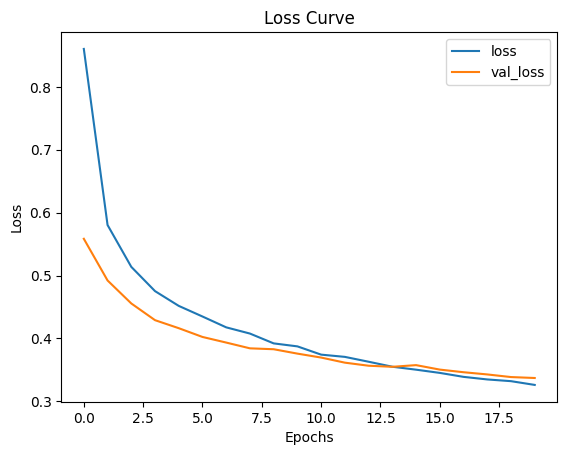

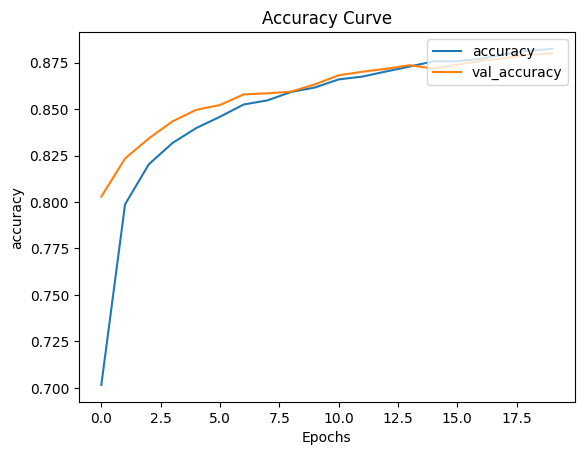

In [54]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

#Collback - MethodeCheckpoint

On a vu un point qui a des meilleurs resultats. On voudrai garder le meilleur resultat, pour le faire on peut utiliser la fction callback.

Les collback sont des fctions introduit lors de l'entrainement, agissant comme un alerte qui permet de surveiller l'accuracy ett sauvegarde le meilleur accuracy lors dans l'entrainement d'un model.

In [55]:
#il permet de sauvegarder le meilleur moddel encours
from tensorflow.keras.callbacks import ModelCheckpoint

In [57]:
#si c'etait le loss, on allait sauvegarder le min.
#on sauvegarde le meilleur
best_model = "best_model.h9"

model_ckp = ModelCheckpoint(filepath=best_model,
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)

In [58]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels,
              epochs=30,
              validation_data=(a_test_images, test_labels),
              callbacks =[model_ckp])

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8517 - accuracy: 0.7072 - val_loss: 0.5504 - val_accuracy: 0.8079
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5763 - accuracy: 0.7995 - val_loss: 0.4845 - val_accuracy: 0.8297
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5118 - accuracy: 0.8198 - val_loss: 0.4528 - val_accuracy: 0.8373
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4736 - accuracy: 0.8328 - val_loss: 0.4317 - val_accuracy: 0.8444
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4501 - accuracy: 0.8386 - val_loss: 0.4151 - val_accuracy: 0.8489
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4285 - accuracy: 0.8471 - val_loss: 0.4123 - val_accuracy: 0.8526
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4149 - accuracy: 0.8519 - val_loss: 0.3942 - val_ac

In [60]:
model_save = tf.keras.models.load_model('best_model.h9')

In [63]:
model_save.evaluate(a_test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8844


[0.3272315561771393, 0.8844000101089478]

#Early stopping

Pour arreter l'entrainement plutot, on peut mettre des conditions pour l'arreter.
On peut mettre plusieurs epoch et arreter lorsque le meilleur accucracy se repete dans plusieurs Epoch

In [64]:
#Callbacks sont des fctions qu'on peut ecrire,inserer lors de l'entrainement
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [65]:
model_ckp

In [66]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels,
              epochs=1000,
              validation_data=(a_test_images, test_labels),
              callbacks =[model_ckp, stop])

Epoch 1/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8535 - accuracy: 0.7062 - val_loss: 0.5529 - val_accuracy: 0.8095
Epoch 2/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5716 - accuracy: 0.8009 - val_loss: 0.4818 - val_accuracy: 0.8297
Epoch 3/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5067 - accuracy: 0.8223 - val_loss: 0.4493 - val_accuracy: 0.8391
Epoch 4/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4729 - accuracy: 0.8330 - val_loss: 0.4380 - val_accuracy: 0.8422
Epoch 5/1000
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4461 - accuracy: 0.8419 - val_loss: 0.4135 - val_accuracy: 0.8531
Epoch 6/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4316 - accuracy: 0.8487 - val_loss: 0.4031 - val_accuracy: 0.8566
Epoch 7/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4135 - accuracy: 0.8538 - val_loss: 0.

#Faire des prédictions  

In [68]:
model_save = tf.keras.models.load_model('best_model.h9')

In [70]:
model_save.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 784)               615440    
                                                                 
 dropout_4 (Dropout)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
a_test_images[515].shape

(784,)

In [102]:
test_labels[515]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [103]:
np.argmax(test_labels[515])

8

In [104]:
labels[8]

'bag'

In [113]:
pred = model_save.predict(a_test_images[515].reshape((1, 784)))

1/1 [==============================] - 0s 19ms/step


In [114]:
pred

array([[3.6394191e-05, 3.0679206e-07, 9.4841280e-06, 2.1336316e-05,
        4.7227612e-05, 3.3399655e-04, 5.8988285e-06, 7.8129295e-07,
        9.9954456e-01, 5.3192149e-08]], dtype=float32)

In [115]:
np.argmax(pred)

8

In [116]:
labels[8]

'bag'

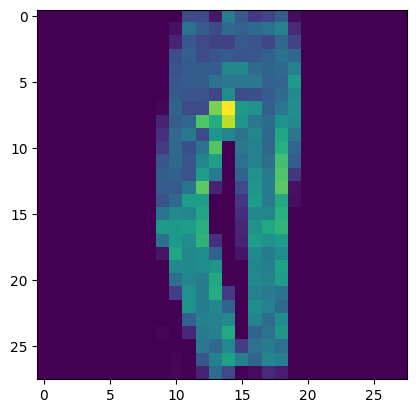

In [119]:
plt.imshow(training_images[515])
#plt.title(labels[training_labels[8]])
plt.show()